In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [104]:
df_Train=pd.read_csv('Titanic Train.csv')
df_Test=pd.read_csv('Titanic test.csv')

In [105]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
df_Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

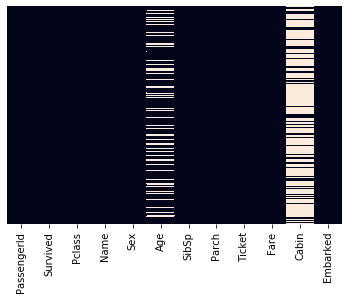

In [108]:
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False)

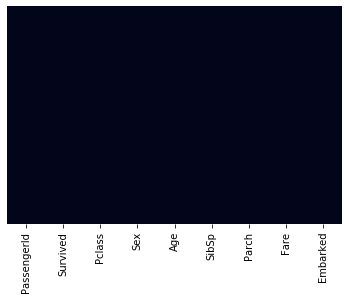

In [109]:
df_Train.drop(['Cabin'],axis=1,inplace=True)
df_Train.drop(['Name'],axis=1,inplace=True)
df_Train.drop(['Ticket'],axis=1,inplace=True)
df_Train['Age']=df_Train['Age'].fillna(df_Train['Age'].mode()[0])
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False)

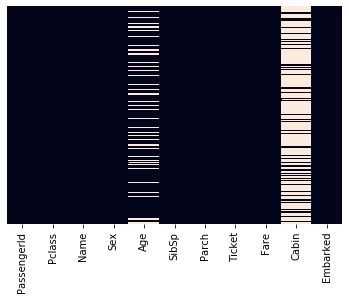

In [110]:
sns.heatmap(df_Test.isnull(),yticklabels=False,cbar=False)

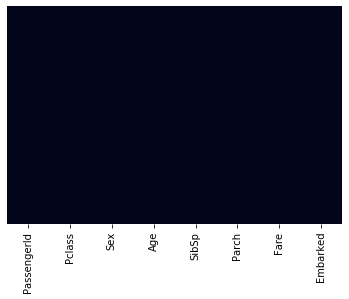

In [111]:
df_Test.drop(['Cabin'],axis=1,inplace=True)
df_Test.drop(['Name'],axis=1,inplace=True)
df_Test.drop(['Ticket'],axis=1,inplace=True)
df_Test['Age']=df_Test['Age'].fillna(df_Test['Age'].mode()[0])
df_Test['Fare']=df_Test['Fare'].fillna(df_Test['Fare'].mode()[0])
sns.heatmap(df_Test.isnull(),yticklabels=False,cbar=False)

In [112]:
df_Test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [113]:
df_Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
df_Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [115]:
S_Dummy=pd.get_dummies(df_Train['Sex'],drop_first=True)
Embarked_Dummy=pd.get_dummies(df_Train['Embarked'],drop_first=True)

In [116]:
df_Train=pd.concat([df_Train,S_Dummy,Embarked_Dummy],axis=1)
df_Train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,0,0,1
888,889,0,3,female,24.0,1,2,23.4500,S,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,C,1,0,0


In [117]:
df_Train.drop(['Sex','Embarked'],axis=1,inplace=True)
df_Train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [118]:
Sx_Dummy=pd.get_dummies(df_Test['Sex'],drop_first=True)
Embark_Dummy=pd.get_dummies(df_Test['Embarked'],drop_first=True)
df_test=pd.concat([df_Test,Sx_Dummy,Embark_Dummy],axis=1)
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,1,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,21.0,0,0,8.0500,S,1,0,1
414,1306,1,female,39.0,0,0,108.9000,C,0,0,0
415,1307,3,male,38.5,0,0,7.2500,S,1,0,1
416,1308,3,male,21.0,0,0,8.0500,S,1,0,1


In [119]:
df_test.drop(['Sex','Embarked'],axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [120]:
X=df_Train[['PassengerId','Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y=df_Train[['Survived']]

In [121]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,n_estimators=300)
model.fit(X,y)

D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [124]:
prediction5=model.predict(df_test)
prediction5

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [125]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': prediction5})
output.to_csv('my_submission.csv', index=False)